In [285]:
import serial
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
ser = serial.Serial('/dev/ttyACM3', 9600, timeout=None)

(144, 176, 3)


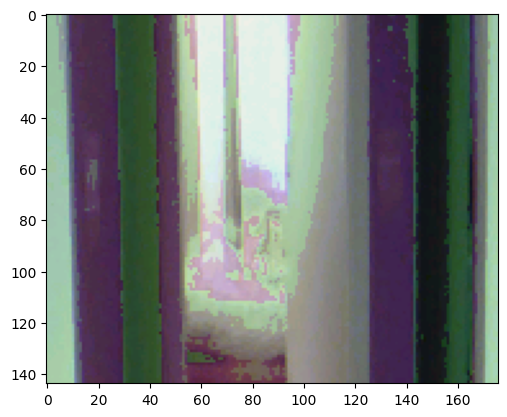

In [291]:
rgb8img = np.zeros(shape=(144,176,3))
rgb565img = np.zeros(shape=(144,176),dtype=np.uint16)
x = ser.read(176*144*2)
dt = np.dtype('<u1')
c = np.frombuffer(x,dtype=dt)
idx = int(0)
for i in range(0,144,1):
    for j in range(0,176,1):
        rgb565img[i,j] = c[idx] << 8 | c[idx+1]
        idx += 2

r = ((rgb565img >> 11) & 0x1f) << 3
g = ((rgb565img >> 5)  & 0x3f) << 2
b = (rgb565img & 0x1f) << 3
rgb = np.dstack((r,g,b)).astype(np.uint8)
print(rgb.shape)
        
plt.imshow(rgb)  


(144, 176, 3)


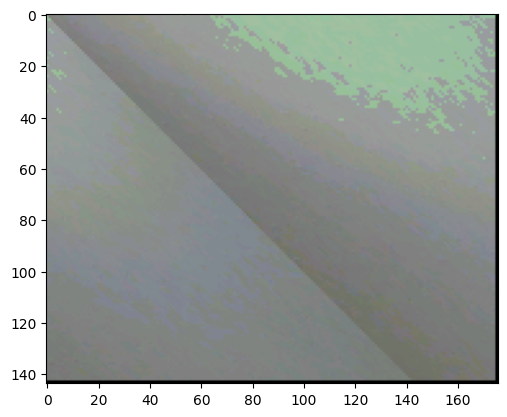

In [251]:
b = list(x)
#c = np.array(b,dtype=np.uint8)
c = np.frombuffer(x,dtype=np.uint8)
count = 0
for i in range(0,143):
    for j in range(0,175):
        rgb565img[i,j] = (c[count] << 8 | c[count+1]).astype(np.uint16)
        count += 2

r = (((rgb565img >> 11) & 0x001f) << 3).astype(np.uint8)
g = (((rgb565img >> 5)  & 0x003f) << 2).astype(np.uint8)
b = ((rgb565img & 0x001f) << 3).astype(np.uint8)
rgb = np.dstack((r,g,b)).astype(np.uint8)
print(rgb.shape)
        
plt.imshow(rgb)  

In [169]:
c = np.array(b,dtype=np.uint8)
rgb565img = np.zeros(shape=(176,144,1),dtype=np.uint16)
z =len(b)
d = np.reshape(c, (int(z/2),2))
print(d.shape)
count = 0
for i in range(0,143):
    for j in range(0,175):
        print(d[count,:],np.sum(d[count,:]))
        rgb565img[j,i,:] = np.sum(d[count,:])
        count += 1

(25344, 2)
[132  82] 214
[132  48] 180
[132  80] 212
[132  80] 212
[132  82] 214
[132  82] 214
[132  82] 214
[132  82] 214
[132  82] 214
[132  82] 214
[140  82] 222
[132  48] 180
[132  82] 214
[132  82] 214
[132  50] 182
[132  50] 182
[132  50] 182
[132  48] 180
[132  82] 214
[132  80] 212
[132  48] 180
[132  50] 182
[132  50] 182
[132  48] 180
[132  50] 182
[132  50] 182
[132  18] 150
[132  50] 182
[132  50] 182
[132  50] 182
[132  16] 148
[132  48] 180
[132  48] 180
[132  48] 180
[132  48] 180
[132  48] 180
[132  48] 180
[132  48] 180
[132  16] 148
[132  16] 148
[131 240] 371
[132  48] 180
[132  16] 148
[132  16] 148
[132  48] 180
[132  48] 180
[132  16] 148
[132  48] 180
[132  16] 148
[132  16] 148
[132  16] 148
[132  16] 148
[132  16] 148
[132  16] 148
[132  16] 148
[132  16] 148
[132  16] 148
[124  15] 139
[123 239] 362
[123 240] 363
[132  16] 148
[123 240] 363
[123 240] 363
[123 240] 363
[123 240] 363
[123 240] 363
[123 239] 362
[123 239] 362
[123 207] 330
[123 239] 362
[123 239]

In [183]:
im = np.random.randint(0,65536,(4,4), dtype=np.uint16)
print(im.shape)

(4, 4)


[293]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


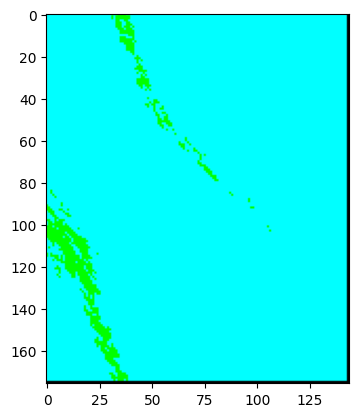

In [178]:
print(rgb565img[154,102])
rgb8img = np.zeros(shape=(176,144,3))
MASK5 = 0b011111
MASK6 = 0b111111
for i in range(0,143):
    for j in range(0,175):
# TODO: BGR or RGB? Who knows!
        im = rgb565img[j,i]
        rgb8img[j,i,0] = ((im >> (5 + 6)) & MASK5) << 3
        rgb8img[j,i,1] = ((im >> 5) & MASK6) << 2
        rgb8img[j,i,2] = (im & MASK5) << 3
        
plt.imshow(rgb8img)  